# 서울시 CCTV 현황 데이터 분석

In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# 화면에 그래프 그리기
%matplotlib inline
# Korean Setting , Minus 표시
mpl.rcParams['axes.unicode_minus'] = False
# family = 폰트 이름 size = 사이즈 크기
mpl.rc('font', family='D2Coding', size=25)
# Graph 크기 변경
plt.rcParams["figure.figsize"]= (15,9)
# Pandas 소수점 2자리까지 표현
# pd.options.display.float_format = '{:.2f}'.format

### 1. 서울통계서비스 사이트에서 '주민등록인구(구별)' 통계에서 2018년도 데이터를 다운 받아서 '서울시 인구현황.txt' 파일로 저장한다.

### 2. 파일에서 데이터를 읽어 컬럼이 '자치구', '인구수', '내국인', '외국인', '고령자' 인 데이터 프레임을 만든다.(pop)

In [2]:
pop = pd.read_csv('서울시 인구현황.txt', skiprows=4 ,sep="\t", thousands=',', usecols=[1,3,6,9,13], names=['자치구', '인구수', '내국인', '외국인', '고령자'])

In [3]:
pop #0,1,3,6,9,13

,자치구,인구수,내국인,외국인,고령자
0,종로구,163026,153065,9961,26742
1,중구,135633,125725,9908,22005
2,용산구,245090,228999,16091,37640
3,성동구,316463,308221,8242,42767
4,광진구,371063,355559,15504,45619
5,동대문구,364338,348052,16286,57165
6,중랑구,408147,403209,4938,61830
7,성북구,447687,435868,11819,67782
8,강북구,322915,319164,3751,58196
9,도봉구,341649,339413,2236,55964


### 3. 외국인 비율과 고령자 비율을 추가한다.

In [4]:
pop['외국인 비율'] = pop['외국인'] / pop['인구수'] * 100
pop['고령자 비율'] = pop['고령자'] / pop['인구수'] * 100

In [5]:
pop.head()

,자치구,인구수,내국인,외국인,고령자,외국인 비율,고령자 비율
0,종로구,163026,153065,9961,26742,6.110068,16.403518
1,중구,135633,125725,9908,22005,7.305007,16.223928
2,용산구,245090,228999,16091,37640,6.565343,15.357624
3,성동구,316463,308221,8242,42767,2.604412,13.514060
4,광진구,371063,355559,15504,45619,4.178266,12.294139


### 4. 서울시 자치구 년도별 CCTV 설치 현황 데이터를 다운 받아서 '서울시 자치구 년도별 CCTV 설치 현황.xlsx' 파일로 저장한후, 데이터를 읽서 데이터 프레임을 만든다.(cctv)

In [6]:
cctv = pd.read_excel('서울시 자치구 년도별 CCTV 설치 현황.xlsx')

In [7]:
cctv.head()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671


### 5. '기관명' 컬럼 데이터의 빈칸을 없애고, 컬럼명을 '자치구'로 변경한다.

In [8]:
cctv['기관명'] = cctv['기관명'].str.replace(' ','')

In [9]:
cctv.rename(columns={'기관명':'자치구'}, inplace=True)
# renme(colums={}, index={}, inplace=True/False)
# inplace -> DataFrame에 반영

In [10]:
cctv.head()

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


In [11]:
### 6. 2015년 이전의 데이터를 합하여 '2015년 이전' 컬럼을 만들고, 최근 3개년간의 데이터를 합하여 '최근 3개년' 컬럼을 만든 후, '최근 증가율' 컬럼을 만든다.

In [12]:
cctv.tail()

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
20,용산구,2063,1279.0,152.0,201.0,107,102,89,60,73
21,은평구,2962,1365.0,83.0,99.0,343,180,296,229,367
22,종로구,1471,8.0,7.0,599.0,132,195,148,281,101
23,중구,1544,25.0,165.0,114.0,80,245,270,317,328
24,중랑구,1068,NaN,NaN,NaN,770,102,121,66,9


In [13]:
cctv.iloc[:,2:5] = cctv.iloc[:,2:5].fillna(0).astype(int)

In [14]:
cctv.tail()

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
20,용산구,2063,1279,152,201,107,102,89,60,73
21,은평구,2962,1365,83,99,343,180,296,229,367
22,종로구,1471,8,7,599,132,195,148,281,101
23,중구,1544,25,165,114,80,245,270,317,328
24,중랑구,1068,0,0,0,770,102,121,66,9


In [15]:
cctv['2015년 이전'] = cctv.iloc[:,2:7].sum(axis=1)

In [16]:
cctv.head()

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2015년 이전
0,강남구,5221,1944,195,316,430,546,765,577,448,3431
1,강동구,1879,303,387,134,59,144,194,273,385,1027
2,강북구,1265,243,88,141,74,145,254,1,319,691
3,강서구,1617,219,155,118,230,187,190,264,254,909
4,관악구,3985,430,56,419,487,609,619,694,671,2001


In [17]:
cctv['최근 3개년'] = cctv.iloc[:,7:10].sum(axis=1)

In [18]:
cctv.head()

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2015년 이전,최근 3개년
0,강남구,5221,1944,195,316,430,546,765,577,448,3431,1790
1,강동구,1879,303,387,134,59,144,194,273,385,1027,852
2,강북구,1265,243,88,141,74,145,254,1,319,691,574
3,강서구,1617,219,155,118,230,187,190,264,254,909,708
4,관악구,3985,430,56,419,487,609,619,694,671,2001,1984


In [19]:
cctv['최근 증가율'] = (cctv['최근 3개년'] -cctv['2015년 이전']) / cctv['2015년 이전'] *100

In [20]:
cctv.head()

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2015년 이전,최근 3개년,최근 증가율
0,강남구,5221,1944,195,316,430,546,765,577,448,3431,1790,-47.828621
1,강동구,1879,303,387,134,59,144,194,273,385,1027,852,-17.039922
2,강북구,1265,243,88,141,74,145,254,1,319,691,574,-16.931983
3,강서구,1617,219,155,118,230,187,190,264,254,909,708,-22.112211
4,관악구,3985,430,56,419,487,609,619,694,671,2001,1984,-0.849575


### 7. '자치구', '소계', '최근 증가율' 컬럼을 제외하고 나머지는 모두 삭제한다.

In [21]:
cctv.drop(cctv.iloc[:, 2:12], axis=1, inplace=True)

In [22]:
cctv.head()

,자치구,소계,최근 증가율
0,강남구,5221,-47.828621
1,강동구,1879,-17.039922
2,강북구,1265,-16.931983
3,강서구,1617,-22.112211
4,관악구,3985,-0.849575


In [23]:
# cctv = cctv[['자치구','소계','2015년 이전', '2016년', '2017년', '2018년', '최근 3개년', '최근 증가율']]

In [24]:
# cctv.head()

### 8. 서울시 인구 데이터와 cctv 데이터를 합친다.

In [25]:
merge = pd.merge(pop, cctv , on="자치구")

In [26]:
merge

,자치구,인구수,내국인,외국인,고령자,외국인 비율,고령자 비율,소계,최근 증가율
0,종로구,163026,153065,9961,26742,6.110068,16.403518,1471,-43.676939
1,중구,135633,125725,9908,22005,7.305007,16.223928,1544,45.468998
2,용산구,245090,228999,16091,37640,6.565343,15.357624,2063,-87.941336
3,성동구,316463,308221,8242,42767,2.604412,13.514060,2679,14.148681
4,광진구,371063,355559,15504,45619,4.178266,12.294139,1581,11.930295
5,동대문구,364338,348052,16286,57165,4.470025,15.690101,2003,-60.612387
6,중랑구,408147,403209,4938,61830,1.209858,15.148954,1068,-77.522936
7,성북구,447687,435868,11819,67782,2.640014,15.140489,3003,-21.991701
8,강북구,322915,319164,3751,58196,1.161606,18.022080,1265,-16.931983
9,도봉구,341649,339413,2236,55964,0.654473,16.380554,858,-33.398058


In [27]:
merge.set_index('자치구', inplace=True)

In [28]:
merge.head()

,인구수,내국인,외국인,고령자,외국인 비율,고령자 비율,소계,최근 증가율
자치구,,,,,,,,
종로구,163026,153065,9961,26742,6.110068,16.403518,1471,-43.676939
중구,135633,125725,9908,22005,7.305007,16.223928,1544,45.468998
용산구,245090,228999,16091,37640,6.565343,15.357624,2063,-87.941336
성동구,316463,308221,8242,42767,2.604412,13.514060,2679,14.148681
광진구,371063,355559,15504,45619,4.178266,12.294139,1581,11.930295


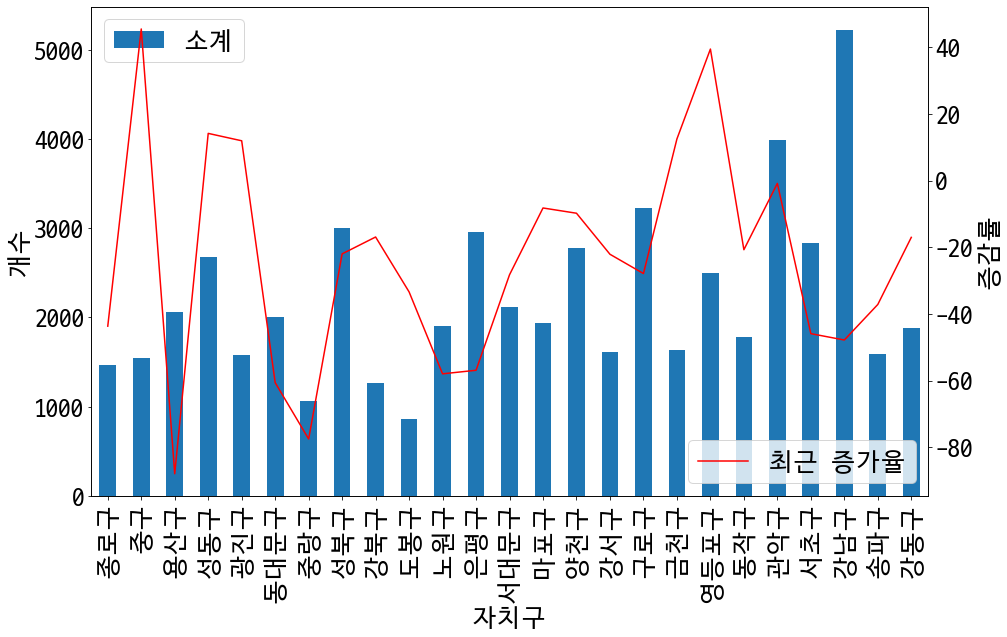

In [29]:
ax1 = merge['소계'].plot.bar()
ax2 = ax1.twinx()
ax2 = merge['최근 증가율'].plot(color='r')

ax1.set_ylabel('개수')
ax2.set_ylabel('증감률')
ax1.legend(loc='best')
ax2.legend(loc='best')

plt.show()

In [30]:
# merge['소계'].sort_values().plot.barh(grid=True).legend(loc='best')
# plt.show()

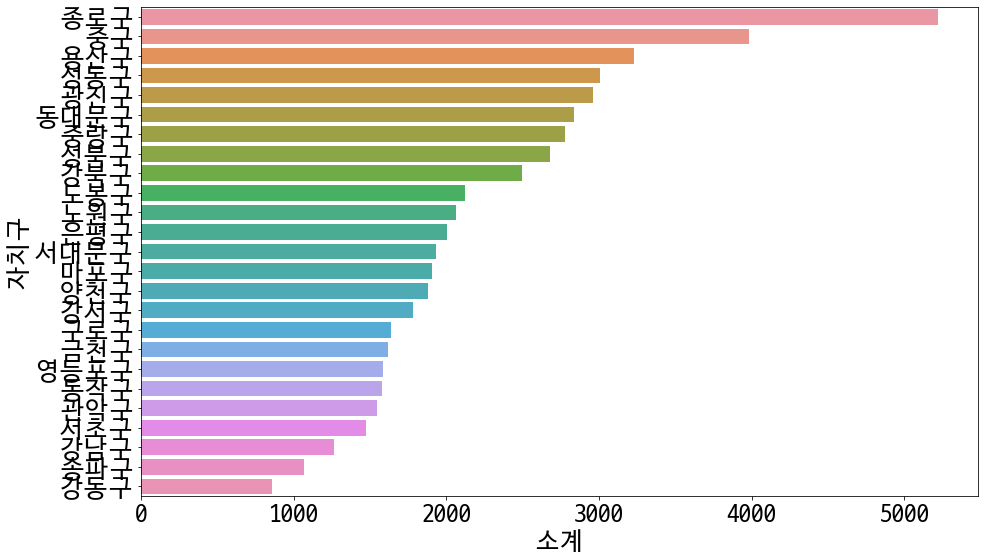

In [31]:
ax1 = merge['소계'].sort_values(ascending=False)
sns.barplot(x= ax1, y=merge.index)
plt.show()

In [32]:
# merge['최근 증가율'].sort_values().plot.barh(grid=True).legend(loc='best')
# plt.show()

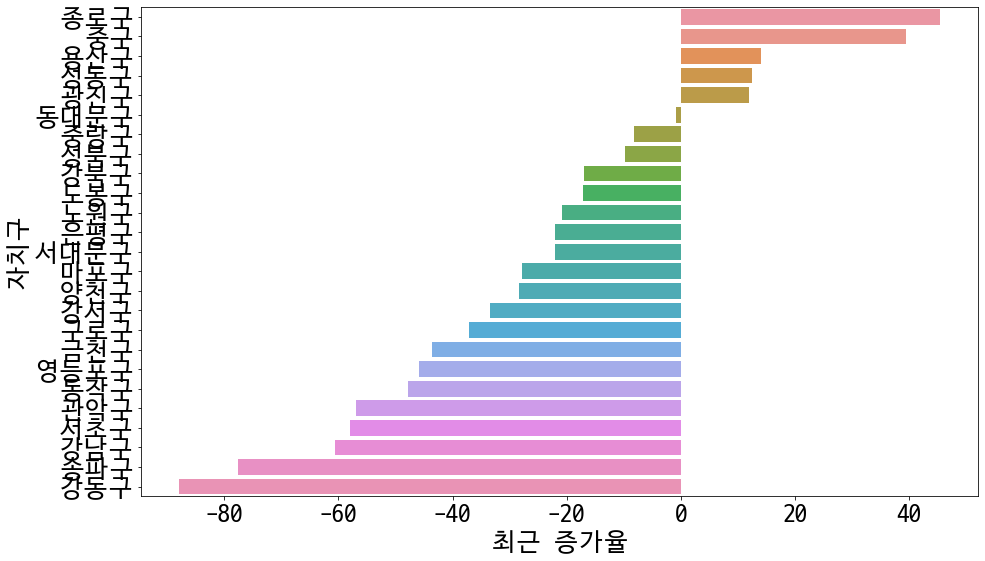

In [33]:
ax2 = merge['최근 증가율'].sort_values(ascending=False)
sns.barplot(x= ax2, y=merge.index)
plt.show()

### - 자치구별 인당 CCTV

In [34]:
merge.head()

,인구수,내국인,외국인,고령자,외국인 비율,고령자 비율,소계,최근 증가율
자치구,,,,,,,,
종로구,163026,153065,9961,26742,6.110068,16.403518,1471,-43.676939
중구,135633,125725,9908,22005,7.305007,16.223928,1544,45.468998
용산구,245090,228999,16091,37640,6.565343,15.357624,2063,-87.941336
성동구,316463,308221,8242,42767,2.604412,13.514060,2679,14.148681
광진구,371063,355559,15504,45619,4.178266,12.294139,1581,11.930295


In [35]:
merge['인당 CCTV'] = merge['소계'] / merge['인구수']

In [36]:
merge.head()

,인구수,내국인,외국인,고령자,외국인 비율,고령자 비율,소계,최근 증가율,인당 CCTV
자치구,,,,,,,,,
종로구,163026,153065,9961,26742,6.110068,16.403518,1471,-43.676939,0.009023
중구,135633,125725,9908,22005,7.305007,16.223928,1544,45.468998,0.011384
용산구,245090,228999,16091,37640,6.565343,15.357624,2063,-87.941336,0.008417
성동구,316463,308221,8242,42767,2.604412,13.514060,2679,14.148681,0.008465
광진구,371063,355559,15504,45619,4.178266,12.294139,1581,11.930295,0.004261


In [37]:
# merge['인당 CCTV'].sort_values().plot.barh(grid=True).legend(loc='best')
# plt.show()

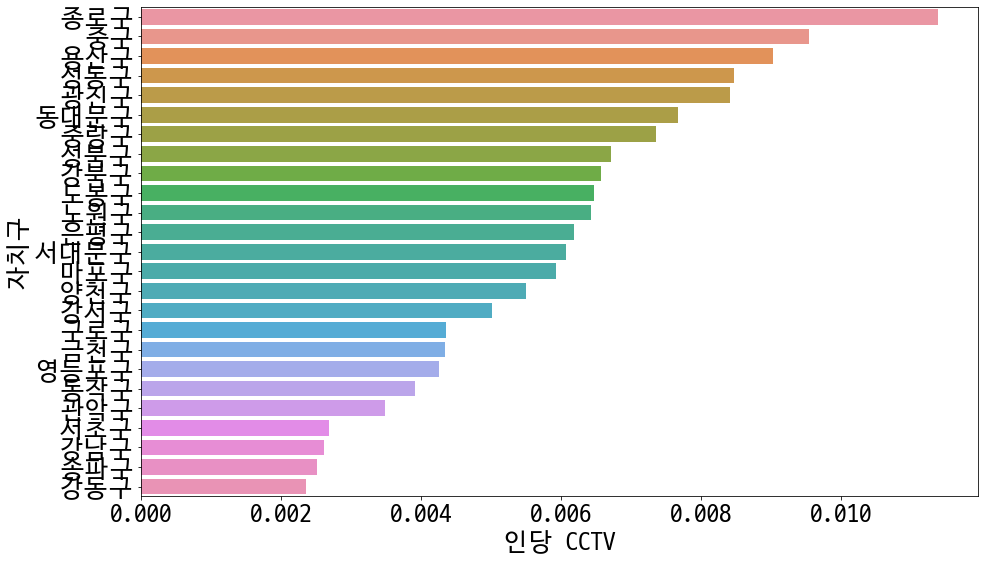

In [38]:
ax3 = merge['인당 CCTV'].sort_values(ascending=False)
sns.barplot(x= ax3, y=merge.index)
plt.show()

### 지자치별 증감율 내림차순

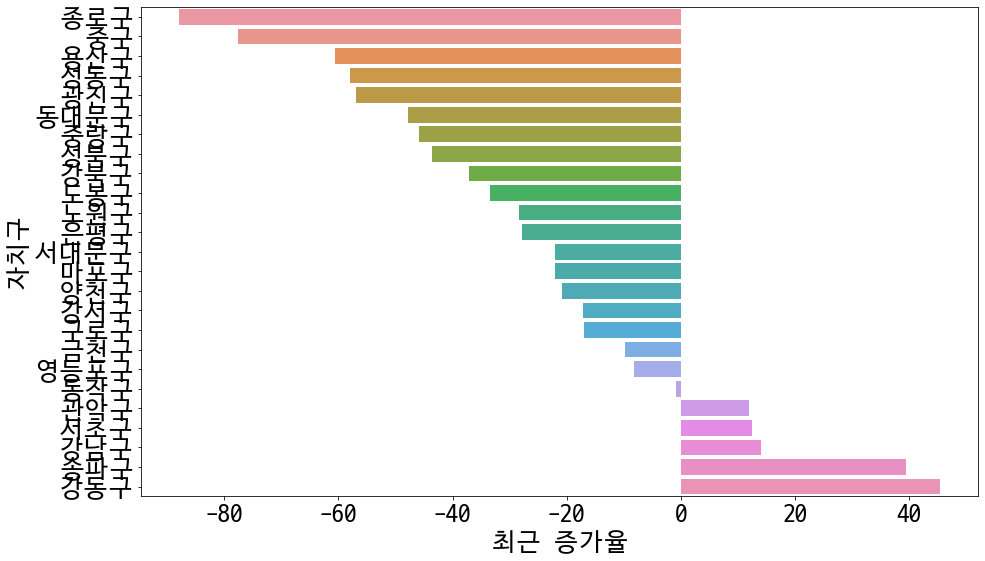

In [39]:
ax4 = merge['최근 증가율'].sort_values()
sns.barplot(x= ax4, y=merge.index)
plt.show()

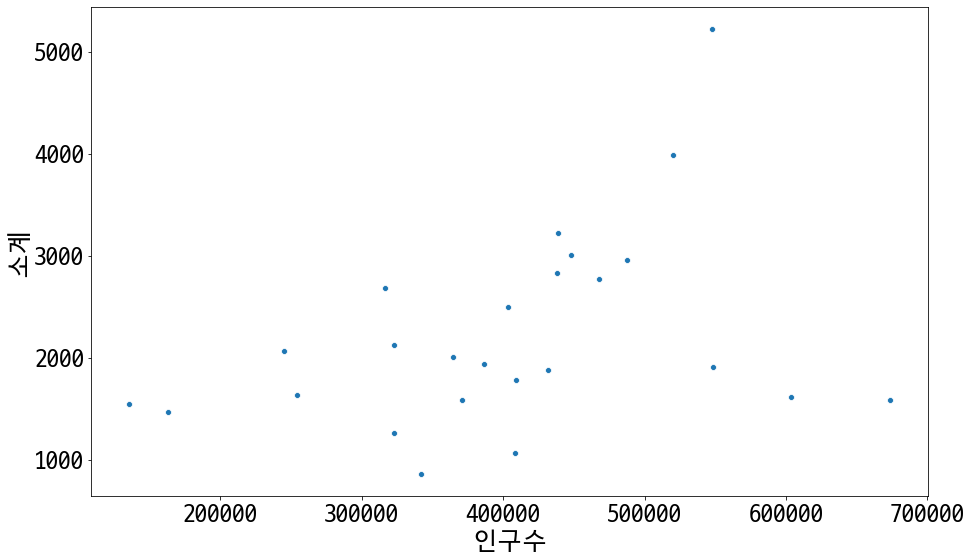

In [40]:
sns.scatterplot(merge['인구수'], merge['소계'])
plt.show()

### cctv 댓수의 선점도 및 희귀선

In [41]:
fp1 = np.polyfit(merge['인구수'], merge['소계'], 1)

In [42]:
fp1

array([2.85240371e-03, 1.07309855e+03])

In [43]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000,101)

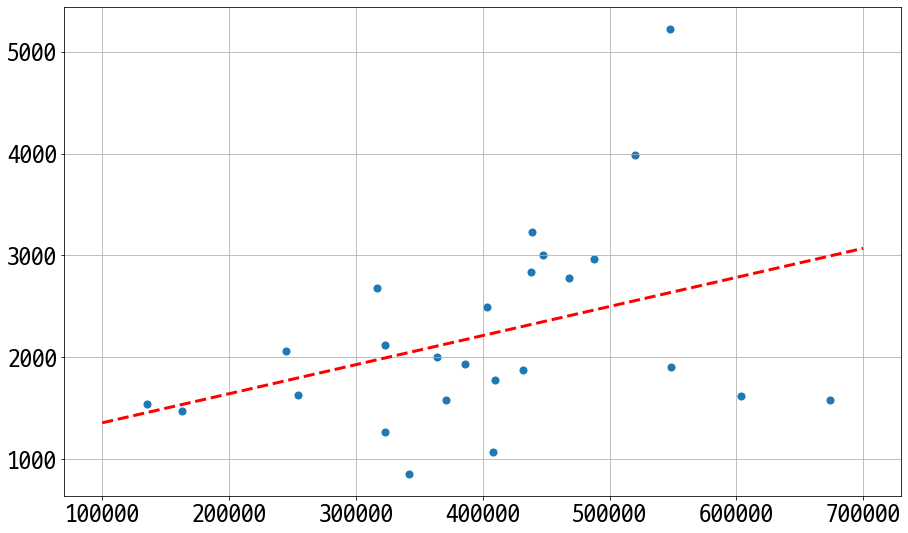

In [44]:
plt.scatter(merge['인구수'], merge['소계'], s = 50)
plt.plot(fx, f1(fx), ls='--', lw=3, color='r')
plt.grid()
plt.show()

### - 인구수와  CCTV 댓수의 산점도, 회귀선 및 자치구명

In [45]:
merge.head()

,인구수,내국인,외국인,고령자,외국인 비율,고령자 비율,소계,최근 증가율,인당 CCTV
자치구,,,,,,,,,
종로구,163026,153065,9961,26742,6.110068,16.403518,1471,-43.676939,0.009023
중구,135633,125725,9908,22005,7.305007,16.223928,1544,45.468998,0.011384
용산구,245090,228999,16091,37640,6.565343,15.357624,2063,-87.941336,0.008417
성동구,316463,308221,8242,42767,2.604412,13.514060,2679,14.148681,0.008465
광진구,371063,355559,15504,45619,4.178266,12.294139,1581,11.930295,0.004261


In [46]:
merge['오차'] = np.abs(merge['소계']-f1(merge['인구수']))

In [47]:
merge

,인구수,내국인,외국인,고령자,외국인 비율,고령자 비율,소계,최근 증가율,인당 CCTV,오차
자치구,,,,,,,,,,
종로구,163026,153065,9961,26742,6.110068,16.403518,1471,-43.676939,0.009023,67.114515
중구,135633,125725,9908,22005,7.305007,16.223928,1544,45.468998,0.011384,84.021380
용산구,245090,228999,16091,37640,6.565343,15.357624,2063,-87.941336,0.008417,290.805827
성동구,316463,308221,8242,42767,2.604412,13.514060,2679,14.148681,0.008465,703.221217
광진구,371063,355559,15504,45619,4.178266,12.294139,1581,11.930295,0.004261,550.520026
동대문구,364338,348052,16286,57165,4.470025,15.690101,2003,-60.612387,0.005498,109.337611
중랑구,408147,403209,4938,61830,1.209858,15.148954,1068,-77.522936,0.002617,1169.298565
성북구,447687,435868,11819,67782,2.640014,15.140489,3003,-21.991701,0.006708,652.917392
강북구,322915,319164,3751,58196,1.161606,18.022080,1265,-16.931983,0.003917,729.182492


In [48]:
df_sort = merge.sort_values(by=['오차'], ascending = False)
df_sort.head(10)

,인구수,내국인,외국인,고령자,외국인 비율,고령자 비율,소계,최근 증가율,인당 CCTV,오차
자치구,,,,,,,,,,
강남구,547453,542364,5089,67085,0.929578,12.254020,5221,-47.828621,0.009537,2586.344483
관악구,520040,501957,18083,72249,3.477233,13.892970,3985,-0.849575,0.007663,1428.537426
송파구,673507,666635,6872,81364,1.020331,12.080647,1586,-37.166324,0.002355,1408.212414
도봉구,341649,339413,2236,55964,0.654473,16.380554,858,-33.398058,0.002511,1189.619423
강서구,603611,596949,6662,79660,1.103691,13.197241,1617,-22.112211,0.002679,1177.840805
중랑구,408147,403209,4938,61830,1.209858,15.148954,1068,-77.522936,0.002617,1169.298565
구로구,438486,404497,33989,61801,7.751445,14.094179,3227,-27.893333,0.007359,903.162358
노원구,548160,543752,4408,77096,0.804145,14.064507,1906,-57.973174,0.003477,730.672166
강북구,322915,319164,3751,58196,1.161606,18.022080,1265,-16.931983,0.003917,729.182492


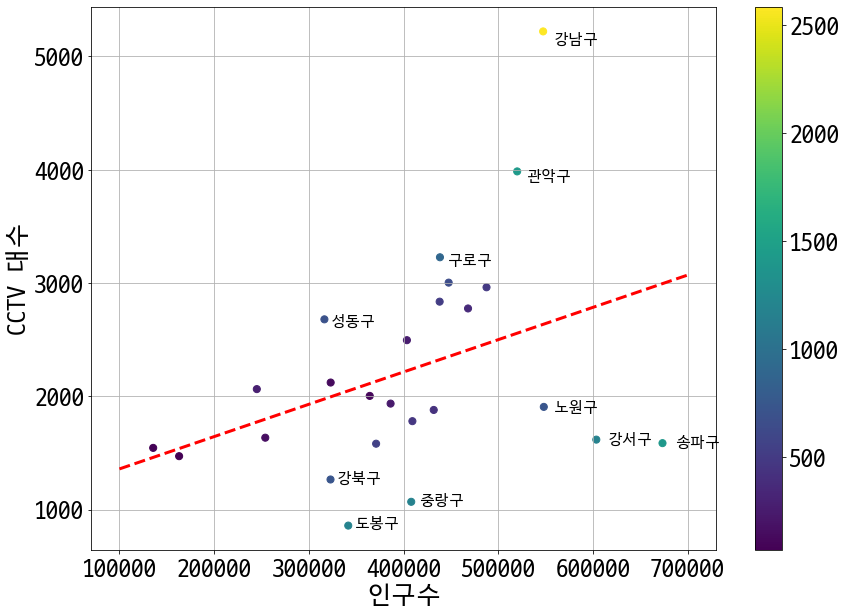

In [49]:
plt.figure(figsize=(14,10))
plt.scatter(merge['인구수'], merge['소계'], c=merge['오차'], s=50)

plt.plot(fx, f1(fx), ls='--', lw=3, color='r')
for n in range(10):
#     plt.text(df_sort['인구수'][n]*1.02, df_sort['소계']*0.98, df_sort.index[n], fontsize = 15)
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98,
            df_sort.index[n], fontsize=15)

plt.xlabel('인구수')
plt.ylabel('CCTV 대수')

plt.colorbar()
plt.grid()
plt.show()

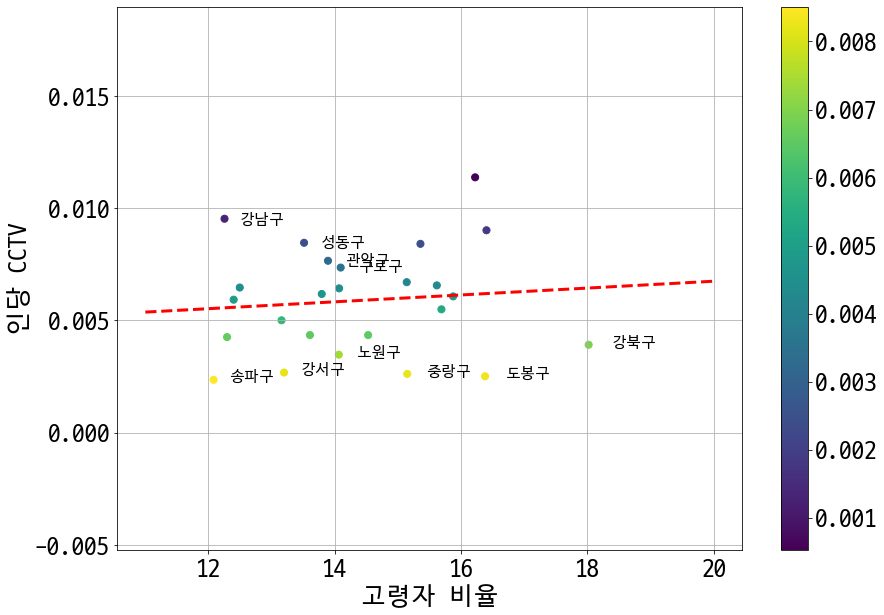

In [65]:
plt.figure(figsize=(14,10))
plt.scatter(merge['고령자 비율'], merge['인당 CCTV'], c=(np.abs(merge['인당 CCTV']-f1(merge['고령자 비율']))), s=50)
fp1 = np.polyfit(merge['고령자 비율'], merge['인당 CCTV'], 1)
f1 = np.poly1d(fp1)
fx = np.linspace(11, 20,101)
plt.plot(fx, f1(fx), ls='--', lw=3, color='r')
for n in range(10):
#     plt.text(df_sort['인구수'][n]*1.02, df_sort['소계']*0.98, df_sort.index[n], fontsize = 15)
    plt.text(df_sort['고령자 비율'][n]*1.02, df_sort['인당 CCTV'][n]*0.98,
            df_sort.index[n], fontsize=15)

plt.xlabel('고령자 비율')
plt.ylabel('인당 CCTV')

plt.colorbar()
plt.grid()
plt.show()

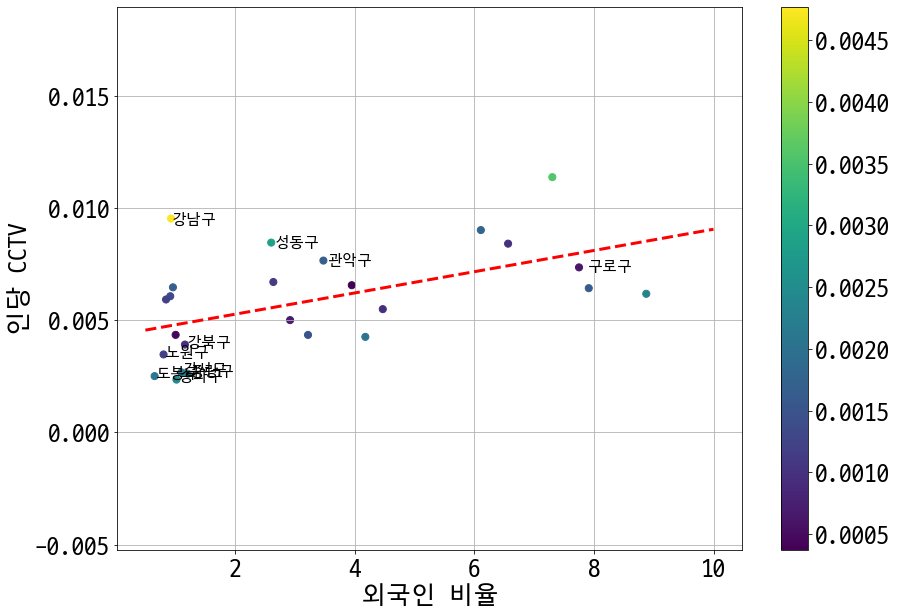

In [58]:
plt.figure(figsize=(14,10))
plt.scatter(merge['외국인 비율'], merge['인당 CCTV'], c=(np.abs(merge['인당 CCTV']-f1(merge['외국인 비율']))), s=50)
fp1 = np.polyfit(merge['외국인 비율'], merge['인당 CCTV'], 1)
f1 = np.poly1d(fp1)
fx = np.linspace(0, 10,101)
plt.plot(fx, f1(fx), ls='--', lw=3, color='r')
for n in range(10):
#     plt.text(df_sort['인구수'][n]*1.02, df_sort['소계']*0.98, df_sort.index[n], fontsize = 15)
    plt.text(df_sort['외국인 비율'][n]*1.02, df_sort['인당 CCTV'][n]*0.98,
            df_sort.index[n], fontsize=15)

plt.xlabel('외국인 비율')
plt.ylabel('인당 CCTV')

plt.colorbar()
plt.grid()
plt.show()